In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas
import datetime

In [99]:
tfl2020 = pd.read_csv("2020_tfl_station_usage_figures.csv")
tfl2020.sample(5)

,Travel Location Name,Travel Location No,Transport Mode,Travel Date,Transaction Type,Count of Taps
570122,WIMBLEDON TRAM,8777,Tram,23/07/2020 00:00,Exit,116
112918,Clapton,6926,Rail,30/03/2020 00:00,Exit,108
164870,Embankment Pier,164,Riverbus,08/02/2020 00:00,PVal,1298
112376,Clapham South,549,Rail,13/03/2020 00:00,Exit,9497
369142,Peckham Rye,5423,Rail,14/10/2020 00:00,Exit,5145


In [5]:
tfl2020.columns.values

array(['Travel Location Name', 'Travel Location No', 'Transport Mode',
       'Travel Date', 'Transaction Type', 'Count of Taps'], dtype=object)

In [100]:
r = ['Station', 'Station_id', 'Mode', 'Date', 'Transaction_Type', 'Tap_count']
tfl2020.columns = r

In [7]:
tfl2020.columns.values

array(['Station', 'Station_id', 'Mode', 'Date', 'Transaction_Type',
       'Tap_count'], dtype=object)

In [11]:
tfl2020.dtypes

Station             object
Station_id           int64
Mode                object
Date                object
Transaction_Type    object
Tap_count            int64
dtype: object

In [101]:

tfl2020['Datetime'] = pd.to_datetime(tfl2020['Date'], format = '%d/%m/%Y %H:%M')

In [102]:
tfl2020['DayofWeek'] = pd.DatetimeIndex(tfl2020['Datetime']).weekday

In [103]:
tfl2020['Year'] = pd.DatetimeIndex(tfl2020['Datetime']).year

In [24]:
tfl2020.sample(3)

,Station,Station_id,Mode,Date,Transaction_Type,Tap_count,Datetime,DayofWeek,Year
290091,Lee,5110,Rail,26/04/2020 00:00,Entry,9,2020-04-26,6,2020
307675,Lower Sydenham,5053,Rail,05/10/2020 00:00,Entry,215,2020-10-05,0,2020
568368,Wimbledon Chase,5612,Rail,22/08/2020 00:00,PVal,196,2020-08-22,5,2020


In [104]:
pattern = "\s+(?=LU)\w+"
tfl2020.loc[tfl2020.Station.str.contains(pattern), "Mode1"] = "LU"

In [105]:
pattern = "\s+(?=DLR)\w+"
tfl2020.loc[tfl2020.Station.str.contains(pattern), "Mode1"] = "DLR"

In [106]:
pattern = "\s+(?=NR)\w+"
tfl2020.loc[tfl2020.Station.str.contains(pattern), "Mode1"] = "NR"

In [107]:
pattern = "\s+(?=TRAM              )\w+"
tfl2020.loc[tfl2020.Station.str.contains(pattern), "Mode1"] = "TRAM"

In [108]:
pattern = "\s+(?=TRAM              )\w+"
tfl2020.loc[tfl2020.Station.str.contains('NaN'), "Mode1"] = "LU"

In [109]:
tfl2020['Mode1'] = tfl2020.Mode1.replace(np.nan, 'LU')

In [110]:
tfl2020['U_Station']=tfl2020.Station.str.replace(r'\s+(?=LU)\w+', "")

In [111]:
tfl2020['U_Station2']=tfl2020.U_Station.str.replace(r'\s+(?=DLR)\w+', "")

In [112]:
tfl2020['U_Station2']=tfl2020.U_Station2.str.replace(r'\s+(?=NR)\w+', "")

In [113]:
tfl2020['U_Station2']=tfl2020.U_Station2.str.replace(r'\s+(?=TRAM              )\w+', "")

In [114]:
tfl2020['U_Station2'] = tfl2020['U_Station2'].str.rstrip()

In [115]:
tfl2020['U_Station2'].unique()

array(['Abbey Road', 'Abbey Wood', 'Acton Central', 'Acton Main Line',
       'Acton Town', 'ADDISCOMBE', 'ADDNGTN VIL', 'Albany Park',
       'Aldgate', 'Aldgate East', 'Alexandra Palace', 'All Saints',
       'Alperton', 'Amersham', 'AMPERE WAY', 'Anerley', 'Angel',
       'Archway', 'ARENA', 'Arnos Grove', 'Arsenal', 'AVENUE ROAD',
       'Baker Street', 'Balham', 'Bank', 'Bankside Pier', 'Banstead',
       'Barbican', 'Barking', 'Barkingside', 'Barnehurst', 'Barnes',
       'Barnes Bridge', 'Barons Court', 'Battersea Park',
       'Battersea Power Station', 'Battersea Power Station Pier',
       'Bayford', 'Bayswater', 'Beckenham Hill', 'Beckenham Junction',
       'BECKENHM JN', 'BECKENHM RD', 'Beckton', 'Beckton Park',
       'Becontree', 'BEDDNGTN LN', 'BELGRAVE WK', 'Bellingham', 'Belmont',
       'Belsize Park', 'Belvedere', 'Bermondsey', 'Berrylands',
       'Bethnal Green', 'Bexley', 'Bexleyheath', 'Bickley', 'Birkbeck',
       'BIRKBECK', 'Blackfriars', 'Blackfriars Pier', 

In [116]:
tfl2020.Mode1.unique()

array(['DLR', 'LU', 'TRAM', 'NR'], dtype=object)

In [117]:
tfl2020.loc[tfl2020.U_Station2.str.contains(pattern), :]

,Station,Station_id,Mode,Date,Transaction_Type,Tap_count,Datetime,DayofWeek,Year,Mode1,U_Station,U_Station2


In [118]:
tfl2020.head(10)

,Station,Station_id,Mode,Date,Transaction_Type,Tap_count,Datetime,DayofWeek,Year,Mode1,U_Station,U_Station2
0,Abbey Road DLR,750,Rail,01/01/2020 00:00,Exit,224,2020-01-01,2,2020,DLR,Abbey Road DLR,Abbey Road
1,Abbey Road DLR,750,Rail,01/01/2020 00:00,PVal,230,2020-01-01,2,2020,DLR,Abbey Road DLR,Abbey Road
2,Abbey Road DLR,750,Rail,01/01/2020 00:00,Entry,229,2020-01-01,2,2020,DLR,Abbey Road DLR,Abbey Road
3,Abbey Road DLR,750,Rail,02/01/2020 00:00,Exit,406,2020-01-02,3,2020,DLR,Abbey Road DLR,Abbey Road
4,Abbey Road DLR,750,Rail,02/01/2020 00:00,PVal,552,2020-01-02,3,2020,DLR,Abbey Road DLR,Abbey Road
5,Abbey Road DLR,750,Rail,02/01/2020 00:00,Entry,430,2020-01-02,3,2020,DLR,Abbey Road DLR,Abbey Road
6,Abbey Road DLR,750,Rail,03/01/2020 00:00,PVal,607,2020-01-03,4,2020,DLR,Abbey Road DLR,Abbey Road
7,Abbey Road DLR,750,Rail,03/01/2020 00:00,Exit,443,2020-01-03,4,2020,DLR,Abbey Road DLR,Abbey Road
8,Abbey Road DLR,750,Rail,03/01/2020 00:00,Entry,461,2020-01-03,4,2020,DLR,Abbey Road DLR,Abbey Road
9,Abbey Road DLR,750,Rail,04/01/2020 00:00,PVal,441,2020-01-04,5,2020,DLR,Abbey Road DLR,Abbey Road


In [119]:
tfl2020.columns.values

array(['Station', 'Station_id', 'Mode', 'Date', 'Transaction_Type',
       'Tap_count', 'Datetime', 'DayofWeek', 'Year', 'Mode1', 'U_Station',
       'U_Station2'], dtype=object)

In [120]:
#drop cols and rename cols
tfl2020 = tfl2020[['Mode1', 'U_Station2', 'Station_id', 'Transaction_Type', 'Datetime', 'DayofWeek', 'Year', 'Tap_count']]

In [121]:
f = ['Mode', 'Station', 'Station_id', 'Transaction_Type', 'Datetime', 'DayofWeek', 'Year', 'Tap_count']

tfl2020.columns = f

In [122]:
tfl2020_fil = tfl2020.loc[(tfl2020.Transaction_Type == 'Entry') | (tfl2020.Transaction_Type == 'Exit')]

In [123]:
tfl2020_fil.Transaction_Type.unique()

array(['Exit', 'Entry'], dtype=object)

In [126]:
tfl2020_fil.Station.unique()

array(['Abbey Road', 'Abbey Wood', 'Acton Central', 'Acton Main Line',
       'Acton Town', 'ADDISCOMBE', 'ADDNGTN VIL', 'Albany Park',
       'Aldgate', 'Aldgate East', 'Alexandra Palace', 'All Saints',
       'Alperton', 'Amersham', 'AMPERE WAY', 'Anerley', 'Angel',
       'Archway', 'ARENA', 'Arnos Grove', 'Arsenal', 'AVENUE ROAD',
       'Baker Street', 'Balham', 'Bank', 'Bankside Pier', 'Banstead',
       'Barbican', 'Barking', 'Barkingside', 'Barnehurst', 'Barnes',
       'Barnes Bridge', 'Barons Court', 'Battersea Park',
       'Battersea Power Station', 'Battersea Power Station Pier',
       'Bayford', 'Bayswater', 'Beckenham Hill', 'Beckenham Junction',
       'BECKENHM JN', 'BECKENHM RD', 'Beckton', 'Beckton Park',
       'Becontree', 'BEDDNGTN LN', 'BELGRAVE WK', 'Bellingham', 'Belmont',
       'Belsize Park', 'Belvedere', 'Bermondsey', 'Berrylands',
       'Bethnal Green', 'Bexley', 'Bexleyheath', 'Bickley', 'Birkbeck',
       'BIRKBECK', 'Blackfriars', 'Blackfriars Pier', 

In [130]:
tfl2020_fil['Station'] = tfl2020_fil.Station.str.title()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
tfl2020_melt = tfl2020_fil.groupby(['Mode','Station','Year','Datetime','DayofWeek']).agg({'Tap_count' : 'sum'}).reset_index()
tfl2020_melt

,Mode,Station,Year,Datetime,DayofWeek,Tap_count
0,DLR,Abbey Road,2020,2020-01-01,2,453
1,DLR,Abbey Road,2020,2020-01-02,3,836
2,DLR,Abbey Road,2020,2020-01-03,4,904
3,DLR,Abbey Road,2020,2020-01-04,5,736
4,DLR,Abbey Road,2020,2020-01-05,6,530
...,...,...,...,...,...,...
231705,TRAM,Woodside,2020,2020-11-26,3,284
231706,TRAM,Woodside,2020,2020-11-27,4,231
231707,TRAM,Woodside,2020,2020-11-28,5,134
231708,TRAM,Woodside,2020,2020-11-29,6,72


In [138]:
tfl2020_melt.loc[tfl2020_melt['DayofWeek'] < 4, "DOW"] = "MTT"

In [139]:
tfl2020_melt.loc[tfl2020_melt['DayofWeek'] == 4, "DOW"] = "FRI"

In [140]:
tfl2020_melt.loc[tfl2020_melt['DayofWeek'] == 5, "DOW"] = "SAT"

In [141]:
tfl2020_melt.loc[tfl2020_melt['DayofWeek'] == 6, "DOW"] = "SUN"

In [144]:
tfl2020_melt.sample(10)

,Mode,Station,Year,Datetime,DayofWeek,Tap_count,DOW
187320,LU,Vauxhall,2020,2020-04-21,1,5284,MTT
75657,LU,Grove Park,2020,2020-01-29,2,4204,MTT
45147,LU,Crossharbour,2020,2020-08-02,6,525,SUN
185076,LU,Upminster,2020,2020-05-10,6,487,SUN
196810,LU,West Acton,2020,2020-11-17,1,1716,MTT
81326,LU,Hanwell,2020,2020-10-20,1,384,MTT
147750,LU,Rickmansworth,2020,2020-10-10,5,2202,SAT
151773,LU,Rye House,2020,2020-09-27,6,68,SUN
152237,LU,Sanderstead,2020,2020-07-19,6,274,SUN
29804,LU,Canning Town,2020,2020-03-10,1,40597,MTT


In [149]:
tfl2020_agg = tfl2020_melt.groupby(['Mode','Station','Year','DOW']).agg({'Tap_count' : 'mean'}).reset_index()
tfl2020_agg

,Mode,Station,Year,DOW,Tap_count
0,DLR,Abbey Road,2020,FRI,544.812500
1,DLR,Abbey Road,2020,MTT,556.513089
2,DLR,Abbey Road,2020,SAT,363.125000
3,DLR,Abbey Road,2020,SUN,248.212766
4,DLR,Canary Wharf,2020,FRI,4195.187500
...,...,...,...,...,...
2942,TRAM,Wimbledon,2020,SUN,668.808511
2943,TRAM,Woodside,2020,FRI,255.872340
2944,TRAM,Woodside,2020,MTT,252.565445
2945,TRAM,Woodside,2020,SAT,160.106383


In [152]:
tfl2020_agg['Tap_count'] = tfl2020_agg.Tap_count.astype(int)

In [153]:
station_coo = pd.read_csv("Stations_20180921.csv")

In [155]:
tfl2020_agg = tfl2020_agg.merge(station_coo, left_on = "Station", right_on = "NAME")
tfl2020_agg

,Mode,Station,Year,DOW,Tap_count,FID,OBJECTID,NAME,EASTING,NORTHING,LINES,NETWORK,Zone,x,y
0,DLR,Canary Wharf,2020,FRI,4195,141,292,Canary Wharf,537677,180140,Jubilee,London Underground,2,-0.016135,51.502917
1,DLR,Canary Wharf,2020,MTT,4527,141,292,Canary Wharf,537677,180140,Jubilee,London Underground,2,-0.016135,51.502917
2,DLR,Canary Wharf,2020,SAT,2361,141,292,Canary Wharf,537677,180140,Jubilee,London Underground,2,-0.016135,51.502917
3,DLR,Canary Wharf,2020,SUN,1566,141,292,Canary Wharf,537677,180140,Jubilee,London Underground,2,-0.016135,51.502917
4,DLR,Shadwell,2020,FRI,3805,123,337,Shadwell,534932,180932,NaN,London Overground,2,-0.055366,51.510700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,TRAM,Wandle Park,2020,SUN,207,410,408,Wandle Park,531414,165512,NaN,Tramlink,5,-0.111770,51.372939
1600,TRAM,Woodside,2020,FRI,255,424,427,Woodside,534701,167101,NaN,Tramlink,5,-0.063966,51.386453
1601,TRAM,Woodside,2020,MTT,252,424,427,Woodside,534701,167101,NaN,Tramlink,5,-0.063966,51.386453
1602,TRAM,Woodside,2020,SAT,160,424,427,Woodside,534701,167101,NaN,Tramlink,5,-0.063966,51.386453


In [156]:
tfl2020_agg.columns.values

array(['Mode', 'Station', 'Year', 'DOW', 'Tap_count', 'FID', 'OBJECTID',
       'NAME', 'EASTING', 'NORTHING', 'LINES', 'NETWORK', 'Zone', 'x',
       'y'], dtype=object)

In [158]:
tfl2020_agg = tfl2020_agg[['Mode', 'Station', 'Year', 'DOW', 'Tap_count', 'LINES', 'Zone', 'x',
       'y']]

In [160]:
f = ['Mode', 'Station', 'Year', 'DOW', 'Tap_count', 'Lines', 'Zone', 'Longitude',
       'Latitude']
tfl2020_agg.columns = f
tfl2020_agg.to_csv("2020_station_tap.csv")

In [161]:
gdf = geopandas.GeoDataFrame(
    tfl2020_agg, geometry=geopandas.points_from_xy(tfl2020_agg.Longitude, tfl2020_agg.Latitude), crs="EPSG:4326")

<AxesSubplot:>

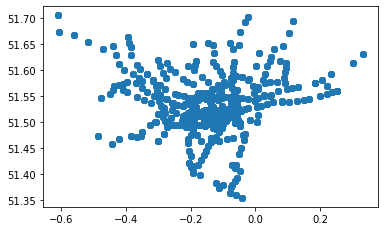

In [162]:
gdf.plot()

In [163]:
gdf.to_file("2020_tapdata.geojson", driver='GeoJSON')

In [2]:
names = pd.read_csv("2020_station_tap.csv")

# forgot to rename some columns... so i need to export to geojson again

In [3]:
names.columns.values

array(['Unnamed: 0', 'Mode', 'Station', 'Year', 'DOW', 'Tap_count',
       'Lines', 'Zone', 'Longitude', 'Latitude'], dtype=object)

In [4]:
names = names[['Mode', 'Station', 'Year', 'DOW', 'Tap_count',
       'Lines', 'Zone', 'Longitude', 'Latitude']]

In [5]:
r = ['Mode', 'Station', 'Year', 'Day', 'Tap_count',
       'Lines', 'Zone', 'Longitude', 'Latitude']
names.columns = r

In [16]:
names.Tap_count.describe()

count     1604.000000
mean      8737.416459
std      12511.489878
min         23.000000
25%       1900.000000
50%       4432.500000
75%       9982.000000
max      92017.000000
Name: Tap_count, dtype: float64

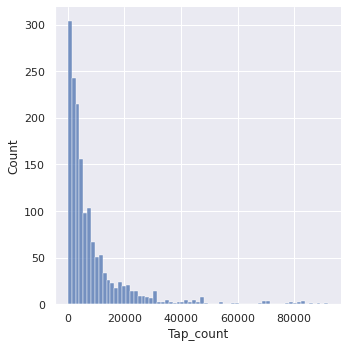

In [49]:
sns.set(rc={'figure.figsize':(11,11)})
ax = sns.displot( data=names, x= 'Tap_count')

In [7]:
names.to_csv("2020_station_tap.csv", index=False)

In [9]:
gdfName = geopandas.GeoDataFrame(
    names, geometry=geopandas.points_from_xy(names.Longitude, names.Latitude), crs="EPSG:4326")

In [10]:
gdfName.to_file("2020_tapdata.geojson", driver='GeoJSON')